# Plotting sim 2

This code implements a plot for the presentation of the results of 'sim_2'. 'sim_2' is the simulation that sweeps the sketch "Hight"-size parameter '\ell' vs the amount of rounds the aggregated attack vector

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import math

class Plot_sim_2():
    def __init__(self, nof_repititions = [20, 5], sd_list = [1.0, 4.0], nof_sim_keys=3, tail_size=1000, b=30, l_list=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], seed=None):
        self.nof_repititions = nof_repititions
        self.nof_sim_keys = nof_sim_keys
        self.sd_list = sd_list
        self.tail_size = tail_size
        self.l_list = l_list
        self.b = b
        self.seed = seed
        self.rng = default_rng(seed)
        #self.results = np.zeros((self.nof_repititions, len(self.l_list), len(self.sd_list)), dtype=float)

    def __repr__(self):
        return "test parameters (for plotting):\n number of repititions = {0}; \n num of keys simulated = {1};\n attack tail size = {2};\n ell values= {3}; sd values {6}\n b = {4}; seed = {5};" \
            .format(self.nof_repititions, self.nof_sim_keys, self.tail_size, self.l_list, self.b, self.seed, self.sd_list)

    def load_data(self, data_path_sd_1 = "./results/data/", file_pef_sd_1 = "sim_2_run_sd_1_ell_", data_path_sd_4 = "./results/data/", file_pef_sd_4 = "sim_2_ell_"):
        #load sd_1 data
        self.data_sd_1 = np.zeros((len(self.l_list), self.nof_repititions[0]), dtype=float)
        for ell_idx in range(len(self.l_list)):
            file_name_sim_2 = file_pef_sd_1 + "{0}.csv".format(self.l_list[ell_idx])
            file_full_name = data_path_sd_1 + file_name_sim_2
            loaded_np_array = np.loadtxt(file_full_name, delimiter=',')
            print("loaded file {0}, data shape {1}, last record: {2}".format(file_full_name, loaded_np_array.shape, loaded_np_array[-1]))
            self.data_sd_1[ell_idx] = loaded_np_array
        #load sd_4 data
        self.data_sd_4 = np.zeros((len(self.l_list), self.nof_repititions[1]), dtype=float)
        for ell_idx in range(len(self.l_list)):
            file_name_sim_2 = file_pef_sd_4 + "{0}.csv".format(self.l_list[ell_idx])
            file_full_name = data_path_sd_4 + file_name_sim_2
            loaded_np_array = np.loadtxt(file_full_name, delimiter=',')
            print("loaded file {0}, data shape {1}, last record: {2}".format(file_full_name, loaded_np_array.shape, loaded_np_array[-1]))
            self.data_sd_4[ell_idx] = loaded_np_array
        
#    def get_data(self, data):
#        self.data = data
    
    def gen_results(self):
        self.sim_2_sd_1_mean = np.mean(self.data_sd_1, axis = 1)
        self.sim_2_sd_1_max  = np.max(self.data_sd_1, axis = 1)
        self.sim_2_sd_1_min  = np.min(self.data_sd_1, axis = 1)
        self.sim_2_sd_4_mean = np.mean(self.data_sd_4, axis = 1)
        self.sim_2_sd_4_max  = np.max(self.data_sd_4, axis = 1)
        self.sim_2_sd_4_min  = np.min(self.data_sd_4, axis = 1)
        
    #after loading data
    def plot_results(self, file_name=None):
        # golden ratio, width adapted ti title fontsize 14
        plt.rcParams["figure.figsize"] = (6.75, 4.17)
        plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ['Computer Modern Roman']})
        # 'New Century Schoolbook', 'Bookman', 'Times', 'Palatino', 'Charter', 'Computer Modern Roman'
        
        title   = "Attack rounds vs. sketch size"
        xlabel  = "Sketch size ($\ell$)"
        ylabel  = "Rounds"
        #r'$\texttt{median(key-counters)} / \sqrt{r\cdot m/b}$'
        plt.title (title , fontsize=14)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        # plot mean
        plt.plot(self.l_list, self.sim_2_sd_1_mean, color='red', marker = 'x', label= r'$\texttt{Bias} = 1\cdot \sigma$')
        plt.plot(self.l_list, self.sim_2_sd_4_mean, color='blue', marker = 'o',label= r'$\texttt{Bias} = 4\cdot \sigma$')
        #
        # plot max... min
        plt.fill_between(self.l_list, self.sim_2_sd_1_min, self.sim_2_sd_1_max, alpha=0.2)
        plt.fill_between(self.l_list, self.sim_2_sd_4_min, self.sim_2_sd_4_max, alpha=0.2)
        # leggend
        plt.legend(loc="upper left")
        #save and show
        if file_name is not None:
            full_file_name = "./results/{0}.png".format(file_name)
            plt.savefig(full_file_name, dpi=600)  # save as png, margins are cut when saving from Jupyter notebook
            print("saved figure in {0}".format(full_file_name))
        plt.show()

## Single shot run

In [26]:
plot = Plot_sim_2(l_list=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
print(plot)

test parameters (for plotting):
 number of repititions = [20, 5]; 
 num of keys simulated = 3;
 attack tail size = 1000;
 ell values= [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]; sd values [1.0, 4.0]
 b = 30; seed = None;


In [27]:
plot.load_data(file_pef_sd_1 = "sim_2_tail_bin_sd_1_ell_", file_pef_sd_4 = "sim_2_tail_bin_sd_4_ell_")

loaded file ./results/data/sim_2_tail_bin_sd_1_ell_100.csv, data shape (20,), last record: 493.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_200.csv, data shape (20,), last record: 1014.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_300.csv, data shape (20,), last record: 1646.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_400.csv, data shape (20,), last record: 1856.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_500.csv, data shape (20,), last record: 2879.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_600.csv, data shape (20,), last record: 3026.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_700.csv, data shape (20,), last record: 4096.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_800.csv, data shape (20,), last record: 4345.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_900.csv, data shape (20,), last record: 4360.0
loaded file ./results/data/sim_2_tail_bin_sd_1_ell_1000.csv, data shape (20,), last record: 4862.0
loaded file ./result

saved figure in ./results/sim_2_plot_v5.png


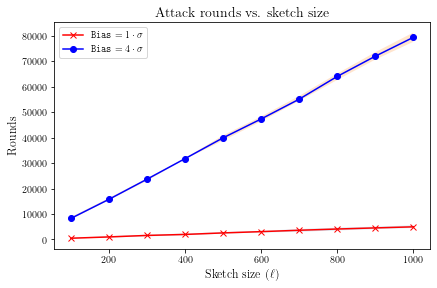

In [28]:
file_name = "sim_2_plot_v5"
plot.gen_results()
plot.plot_results(file_name)

In [49]:
print(plot.data_sd_1.shape)
print(plot.data_sd_1[6])
data_sd_1 = plot.data_sd_1

(7, 20)
[12788. 12177. 13622. 11395. 14278. 15053. 10607. 11599. 14364. 13675.
 13068. 12226. 12487. 11539. 12452. 11728. 13639. 12586. 13953. 11973.]


In [68]:
plot = Plot_sim_2(l_list=[100, 200, 300, 400, 500, 600, 700])
plot.data_sd_1 = data_sd_1

In [87]:
plot.gen_results()
print(plot.sim_2_sd_1_mean)
print(plot.sim_2_sd_1_max)
print(plot.sim_2_sd_1_min)

[  645.75  1493.05  2637.6   4290.7   6163.3   8836.45 12760.45]
[  864.  1978.  3013.  5286.  7283. 11015. 15053.]
[  466.  1178.  2245.  3412.  5158.  7188. 10607.]


saved figure in ./results/plot_sim_2_SD4.png


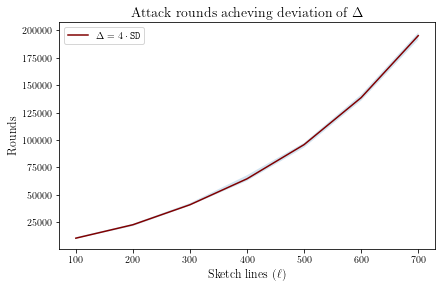

In [88]:
plot.plot_results("plot_sim_2_SD4")